<a href="https://colab.research.google.com/github/kmk3593/google_drive/blob/main/hg_chapter5/chapter_5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 결정 트리
- 결정 트리로 다음 문제를 해결해 보자
  - 와인 캔에 인쇄된 알코올 도수, 당도, pH값으로 와인 종류를 구별해야 한다.

### 로지스틱 회귀로 와인 분류하기
- 우선 로지스틱 회귀로 문제 해결을 시도해본다.

### 데이터 불러오기
- 와인데이터
  + alcohol(알고올 도수), sugar(당도), pH(산도)
  + 클래스 0 = 레드 와인
  + 클래스 1 = 화이트 와인
  

In [ ]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine.head(5) # 데이터 잘 들어왔는지 확인

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


- info()
  + 결측치 확인 / 변수 타입
  

In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [ ]:
wine.describe()
# 표준화가 안되어 있음을 알 수 있다.

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


### 표준화 작업
- 배열로 바꿔서 진행

In [ ]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()  # 참고할 데이터
target = wine['class'].to_numpy()                   # class = 타깃값 = 어떤 와인인지 구분하는 것이 목표 

### 훈련데이터와 테스트데이터로 분리
- train_test_split() 함수는 설정값을 지정하지 않으면 25%를 테스트 세트로 지정한다.
- 이번엔 샘플 개수가 충분히 많으므로 20% 정도만 테스트 세트로 나눈다.
- test = 0.2 에는 이러한 의도가 담겨 있다.

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42    # test_size=0.2 는 20%를 테스트 세트로 한다는 뜻.
)

print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


- 이제 표준화 진행하자

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

### 모델 만들기

### 로지스틱 회귀
- 표준변환된 train_scaled와 test_scaled를 사용해 로지스틱 회귀 모델을 훈련한다.

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))
print(lr.coef_, lr.intercept_)

0.7808350971714451
0.7776923076923077
[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


- 점수가 높게 나오지 않았다.
- 결정 트리를 이용하여 좀 더 쉽게 문제를 해결해보자

로지스틱 회귀
- 수식

의사결정트리의 기본 알고리즘을 활용해서, MS, 구글 등 이런 회사들이 신규 알고리즘을 만듬
- XGBoost, lightGBM, CatBoost
- 캐글 정형데이터
- lightGBM (지금 현재 실무에서 많이 쓰임)
  + 4월 말까지는 코드에 집중. 대회 나감
  + PPT (알고리즘 소개)

### 결정 트리 (Decision Tree)
- 스무 고개와 같다.
- 질문을 하나씩 던져서 정답과 맞춰가는 것이다.
- 표준화된 훈련 세트를 이용하여 결정트리를 사용해 본다.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target)) # 훈련 세트
print(dt.score(test_scaled, test_target))   # 테스트 세트

0.996921300750433
0.8592307692307692


- 위 코드의 두 결과는 차이가 있다.
- 두 결과가 유사하게 나와야 한다.
- 앞으로 '가지치기'에서 차이를 좁히는 과정을 진행한다. 

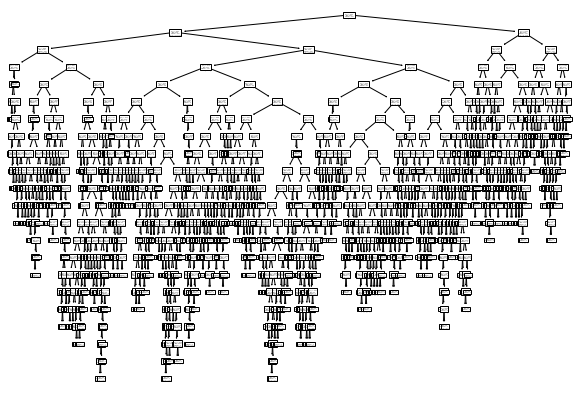

In [ ]:
# 현재 트리의 형태를 출력해본다.
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

- 과대적합이 나오는 이유 : 조건식을 걸기 때문

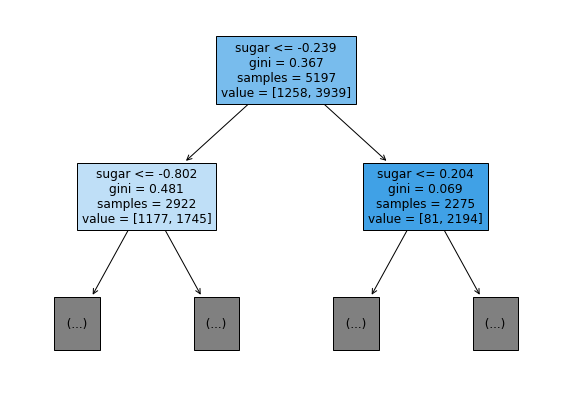

In [ ]:
# plot_tree()함수에서 트리의 깊이를 제한하여 출력해 본다.
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

- 불순도 : 운동회 ox 퀴즈에서 정답을 맞힌 사람만 살아남는 것과 같은 원리

### 가지치기
- 과대적합을 방지하기 위한 것
- 가지치기를 통해 두 결과가 유사하게 출력된다.

In [ ]:
dt = DecisionTreeClassifier(max_depth = 3, random_state=42) # max_depth 매개변수 조절을 통해 가지치기 한다.
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target)) # 훈련 세트
print(dt.score(test_scaled, test_target))   # 데이터 세트

0.8454877814123533
0.8415384615384616


- 훈련 세트와 테스트 성능이 유사하게 출력되었다.
- 이런 모델을 트리 그래프로 그린다면 훨씬 이해햐기 쉬울 것이다.

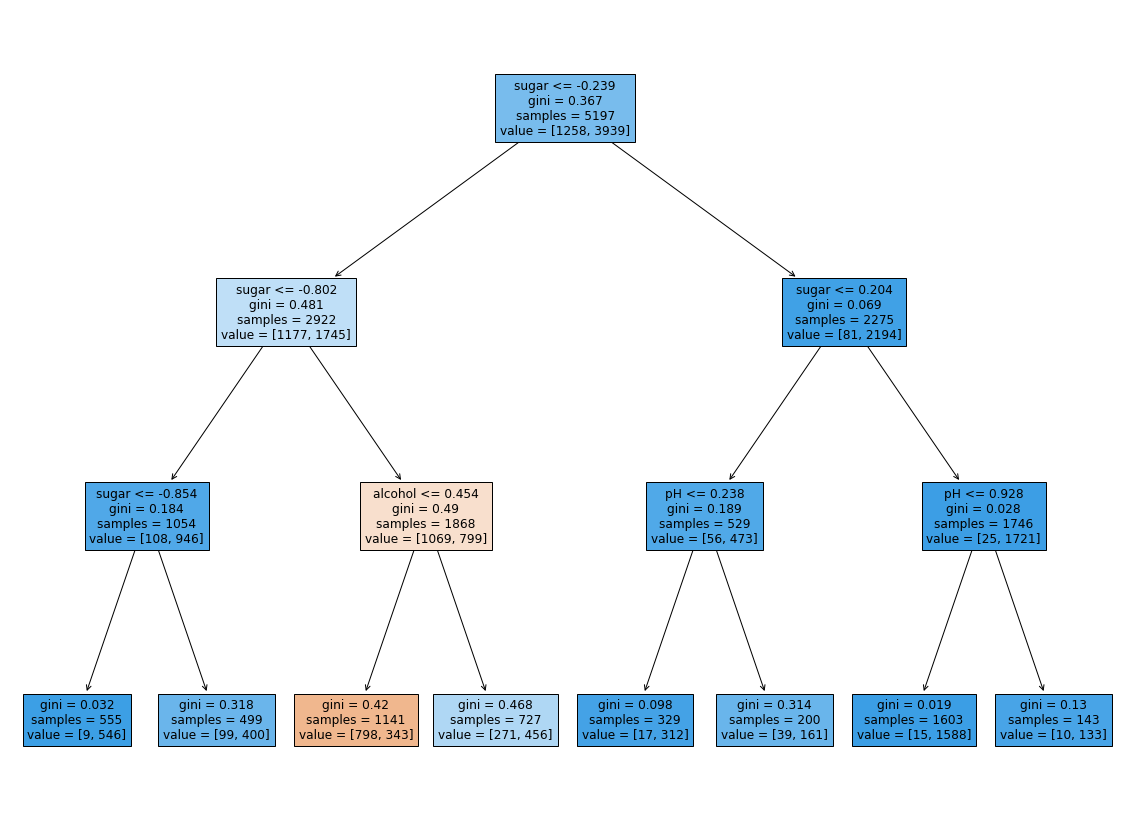

In [ ]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

- 훨씬 보기 좋게 출력되었다.
- 루트 노트
  - 당도(sugar)를 기준으로 훈련세트를 나눈다.
- 깊이 1의 노드
  - 모두 당도(sugar)를 기준으로 훈련 세트를 나눈다.
- 깊이 2의 노드
  - 맨 왼쪽의 노드만 당도를 기준으로 나눈다.
  - 왼쪽에서 두 번째 노드는 알고올 도수(alcohol)를 기준으로 나눈다.
  - 오른쪽 두 노드는 pH를 기준으로 나눈다.
- 리프 노드
  - 왼쪽에서 3번째에 있는 노드만 음성 클래스가 더 많다.
    - 이 노드에 도착해야만 레드 와인으로 예측한다.
    - 이 노드에 도달하려면 -0.802 < sugar < -0.239, alcohol < -0.454 라는 조건을 만족해야 한다.
    - 즉, -0.802 < sugar < -0.239, alcohol < -0.454 이면 레드와인이다


- 그런데 -0.802라는 음수로 된 당도를 어떻게 설명해야할까?
  - 좀 더 설명하기 쉽게 바꿔보자.
- 특성값의 스케일은 결정 트리 알고리즘에 아무런 영향을 미치지 않는다.
- 따라서 표준화 전처리를 할 필요가 없다.
- 전처리하기 전의 훈련 세트(train_input)와 테스트 세트(test_input)로 결정 트리 모델을 다시 훈련해 본다.

In [ ]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)

# 가지치기 때와 달리 train_scaled를 사용하지 않았다. 표준화 전처리 할 필요가 없기 때문인 듯.
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(train_input, train_target))

0.8454877814123533
0.8454877814123533


- 정확히 같은 결과가 나왔다.
- 트리도 그려보자.

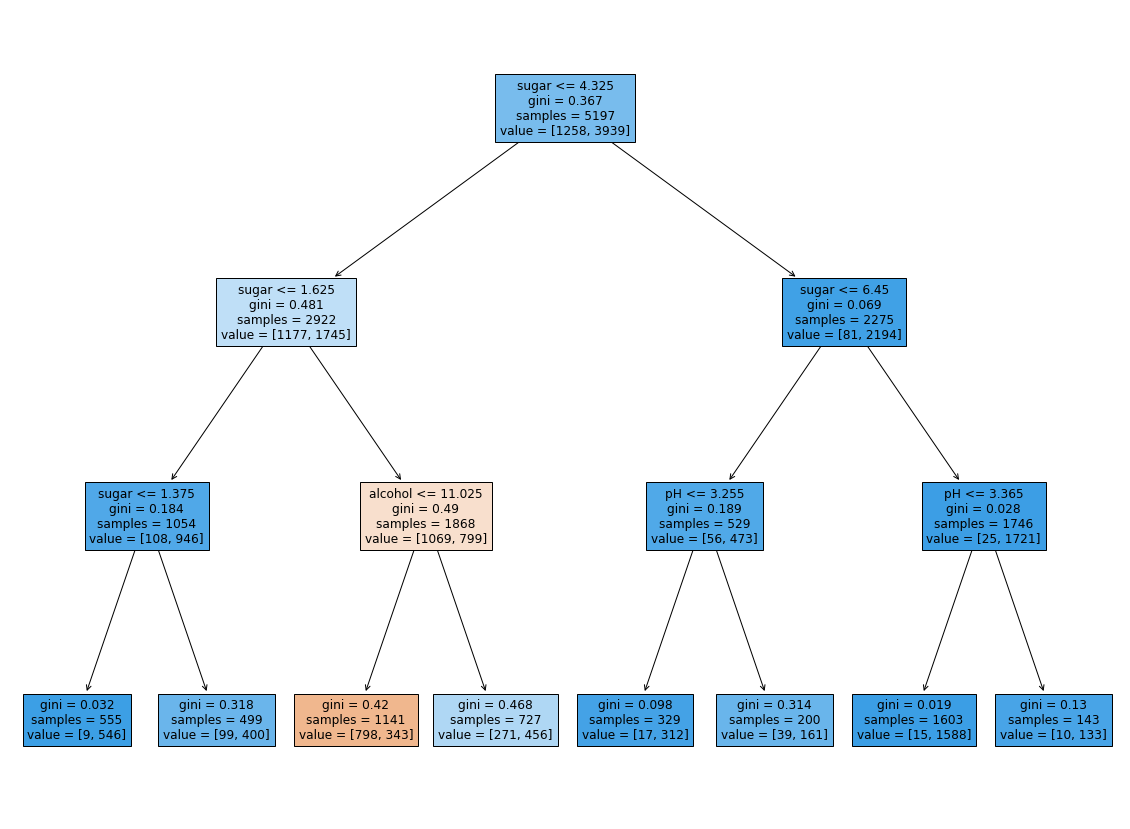

In [ ]:
plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

- 같은 트리지만 특성값을 표준점수로 바꾸지 않았기에 이해하기 훨씬 쉽다.
  - 적어도 당도를 음수로 표기하는 것보단 보기 좋다.
- 다음 조건을 만족하는 것이 레드 와인이다.
  - (1.625 < sugar < 4.325) AND (alcohol < 11.025) = 레드 와인 

- 특성 중요도
  - 결정 트리는 어떤 특성이 가장 유용한지 나타내는 특성 중요도를 계산해준다.
  - 이 트리의 루트 노드와 깊이 1에서 sugar를 사용했기 때문에 아마 sugar가 가장 유용한 특성 중 하나일 것이다.
  - 특성 중요도는 결정 트리 모델의 feature_importances_ 속성에 저장되어 있다.

In [ ]:
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]


- alcohol ,sugar, ph 순서이기 때문에 두 번째인 sugar의 중요도가 가장 높은 것을 알 수 있다.

- 번외

In [ ]:
import graphviz
from sklearn import tree

# DOT data
dot_data = tree.export_graphviz(dt, out_file=None, 
                                feature_names = ['alcohol', 'sugar', 'pH'],  
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph
graph.render("decision_tree_graphivz")

'decision_tree_graphivz.png'

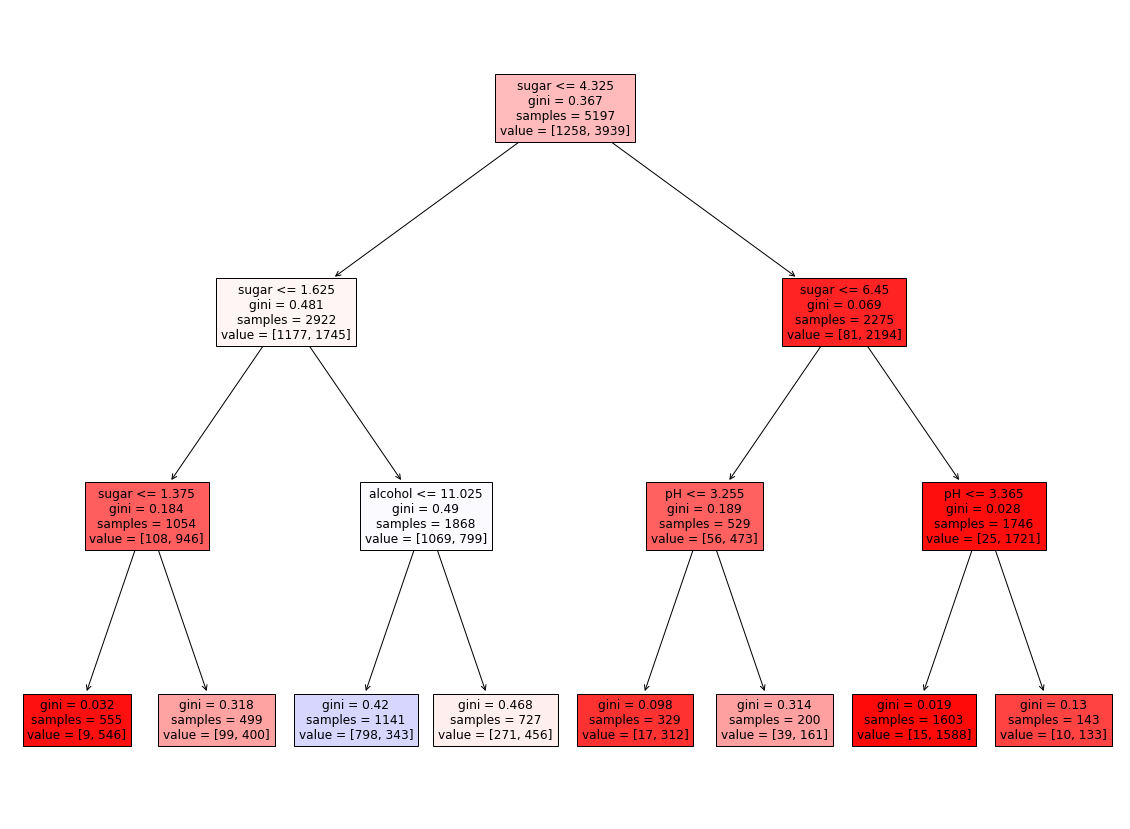

In [ ]:
from matplotlib.colors import ListedColormap, to_rgb
import numpy as np

plt.figure(figsize=(20, 15))
artists = plot_tree(dt, filled = True, 
          feature_names = ['alcohol', 'sugar', 'pH'])

colors = ['blue', 'red']
for artist, impurity, value in zip(artists, dt.tree_.impurity, dt.tree_.value):
    r, g, b = to_rgb(colors[np.argmax(value)])
    f = impurity * 2
    artist.get_bbox_patch().set_facecolor((f + (1-f)*r, f + (1-f)*g, f + (1-f)*b))
    artist.get_bbox_patch().set_edgecolor('black')

plt.show()

- Reference : 혼자 공부하는 머신러닝 + 딥러닝 